In [60]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

In [61]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [62]:
# 读取数据
dataset = pd.read_csv("data/预测不良反应.csv").to_numpy(dtype=float)
# 分离特征和标签，处理矩阵
X = dataset[:, :12]
labels = dataset[:, 12:].T.astype(int)
label_text = ["体重","年龄","性别","身高","是否吸烟","是否酗酒","有无PONV","有无手术史","有无既往史","有无晕动史","镇痛药用药量","镇静药名称"]
models = []
# 遍历每一组标签，然后训练
for label in labels:
    X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.2, random_state=42)
    model = xgb.XGBClassifier()
    model.fit(X_train, y_train)
    models.append(model)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    # f1 = f1_score(y_test, y_pred, average="macro")
    print(f"accuracy: {accuracy}")

accuracy: 0.9357429718875502
accuracy: 0.9759036144578314
accuracy: 0.9879518072289156
accuracy: 0.927710843373494
accuracy: 0.9919678714859438
accuracy: 0.9919678714859438
accuracy: 0.9196787148594378
accuracy: 0.9718875502008032
accuracy: 0.9518072289156626
accuracy: 0.8554216867469879
accuracy: 0.9116465863453815
accuracy: 0.9558232931726908
accuracy: 0.9558232931726908


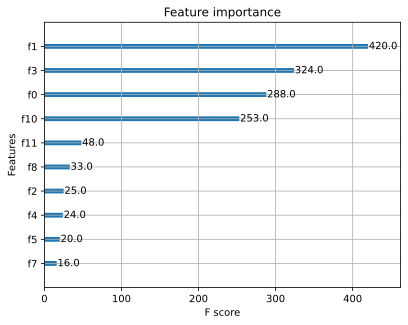

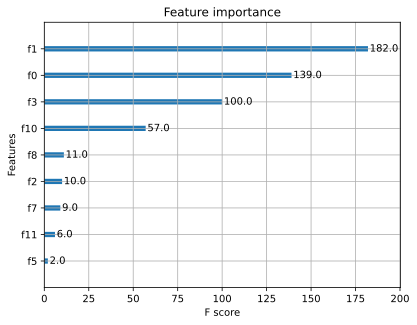

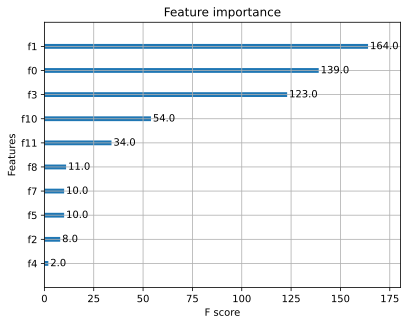

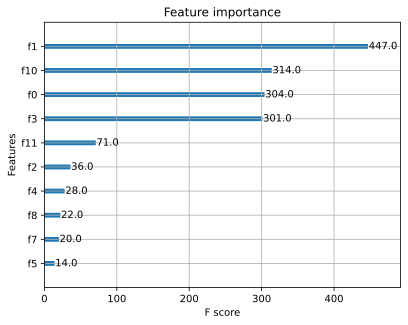

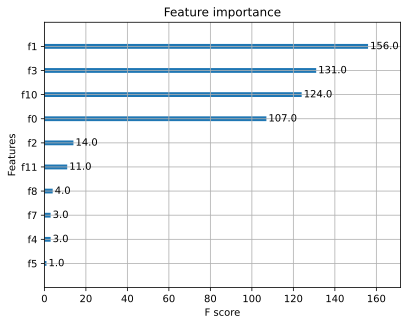

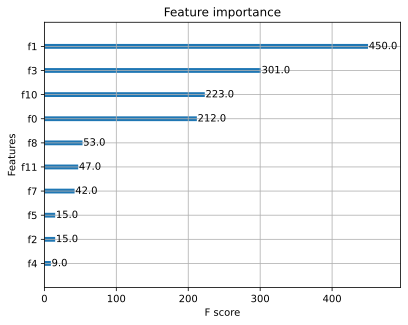

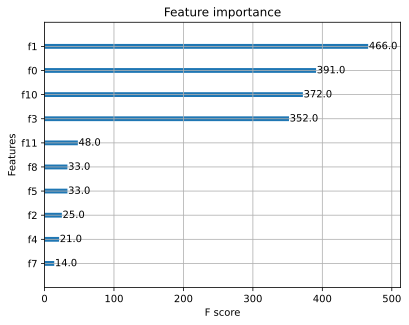

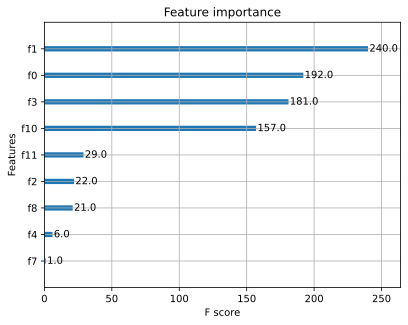

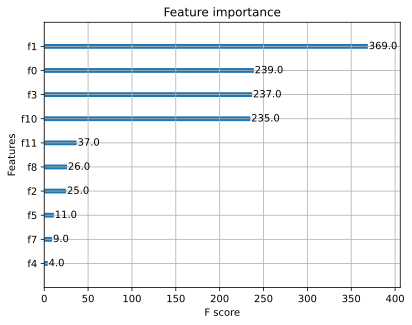

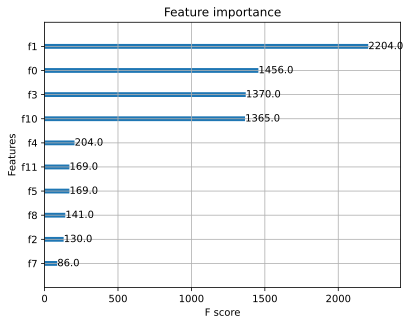

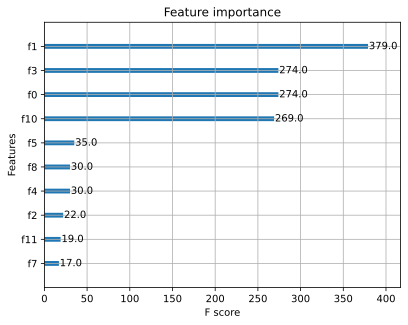

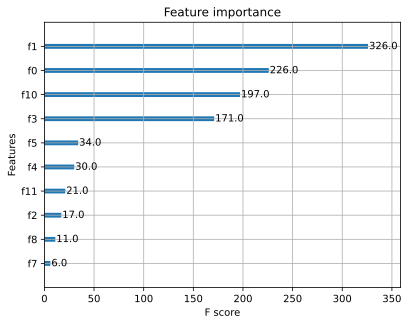

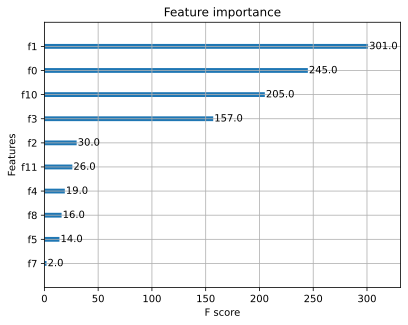

In [63]:
# 打印模型的重要性采样结果
for model in models:
    xgb.plot_importance(model)
    plt.show()